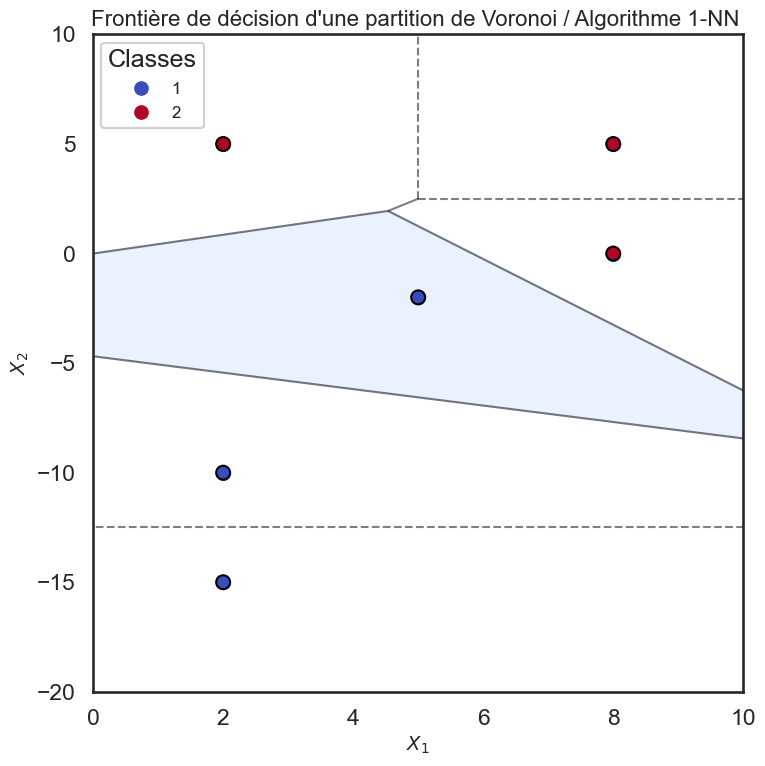

In [4]:
# Auteur: Emiliano Aviles
# Date: 30 Septembre 2024

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

# Training data
X_train = np.array([[5, 2, 2, 8, 2, 8],
                   [-2, -10, -15, 0, 5, 5]]).T
y_train = np.array([1, 1, 1, 2, 2, 2])

# Create Voronoi object
vor = Voronoi(X_train)

# Get Voronoi vertices and regions
vor_vertices = vor.vertices
vor_regions = vor.regions

# Set up figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the Voronoi regions using built-in function but hide unwanted lines
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=1.5, line_alpha=0.5, point_size=20)

# Plot scatter points with Seaborn styling and soft color palette
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=sns.color_palette("coolwarm", as_cmap=True), s=100, edgecolor='black', zorder=10)

# Fill Voronoi regions with soft colors from Seaborn palette
colors = sns.color_palette("coolwarm", len(X_train))
for region_index, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:  # Ignore regions with infinite points
        polygon = [vor.vertices[i] for i in region]
        ax.fill(*zip(*polygon), color=colors[region_index % len(X_train)], alpha=0.2)

ax.grid(False)

# Set a bounding box for the diagram to limit the infinite regions
ax.set_xlim([min(X_train[:, 0]) - 2, max(X_train[:, 0]) + 2])
ax.set_ylim([min(X_train[:, 1]) - 5, max(X_train[:, 1]) + 5])

ax.set_title("Frontière de décision d'une partition de Voronoi / Algorithme 1-NN ", fontsize=16)
ax.set_xlabel('$X_{1}$', fontsize=14)
ax.set_ylabel('$X_{2}$', fontsize=14)

legend1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left", fontsize=12)
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


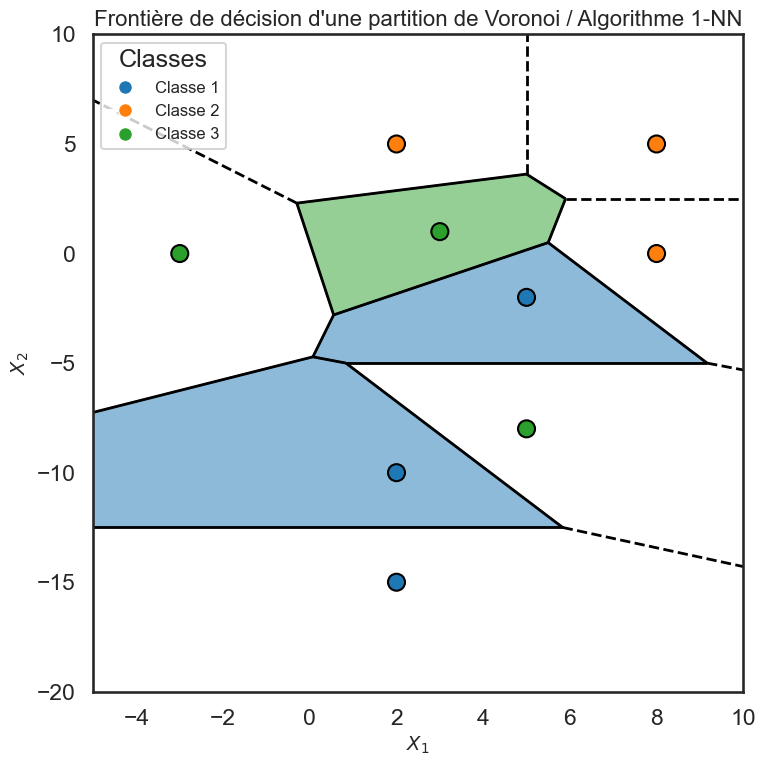

In [36]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_context("talk")
sns.set_style("white")

# Updated Training data (with a third class)
X_train = np.array([[5, 2, 2, 8, 2, 8, 3, -3, 5],
                   [-2, -10, -15, 0, 5, 5, 1, 0, -8]]).T
y_train = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3])  # Adding class 3

# Custom color palette: 1st class cool, 2nd warm, 3rd green
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create Voronoi object
vor = Voronoi(X_train)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the Voronoi regions and color them by class
for point_idx, region_idx in enumerate(vor.point_region):
    region = vor.regions[region_idx]
    if not -1 in region:  # Ignore infinite regions
        polygon = [vor.vertices[i] for i in region]
        ax.fill(*zip(*polygon), color=colors[y_train[point_idx] - 1], alpha=0.5, edgecolor='black')  # Fill color based on class

# Plot the Voronoi boundary lines in black, using the built-in function
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2, line_alpha=1, point_size=20)

# Plot the scatter points with the same color palette
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=[colors[i - 1] for i in y_train], s=150, edgecolor='black', zorder=10)

# Remove unnecessary grid lines for cleaner appearance
ax.grid(False)

# Set a bounding box for the diagram to limit the infinite regions
ax.set_xlim([min(X_train[:, 0]) - 2, max(X_train[:, 0]) + 2])
ax.set_ylim([min(X_train[:, 1]) - 5, max(X_train[:, 1]) + 5])

# Set title and labels with Seaborn aesthetics
ax.set_title("Frontière de décision d'une partition de Voronoi / Algorithme 1-NN", fontsize=16)
ax.set_xlabel('$X_{1}$', fontsize=14)
ax.set_ylabel('$X_{2}$', fontsize=14)

# Add legend for classes using custom color palette
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Classe {i+1}') for i in range(3)]
ax.legend(handles=handles, title="Classes", loc="upper left", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
